In [74]:
import matplotlib.pyplot as plt
import numpy
import os
import pandas as pd
import warnings
from mplbasketball import Court
from mplbasketball.utils import transform

In [75]:
# Ignore warnings
warnings.filterwarnings("ignore")

# Court plotting

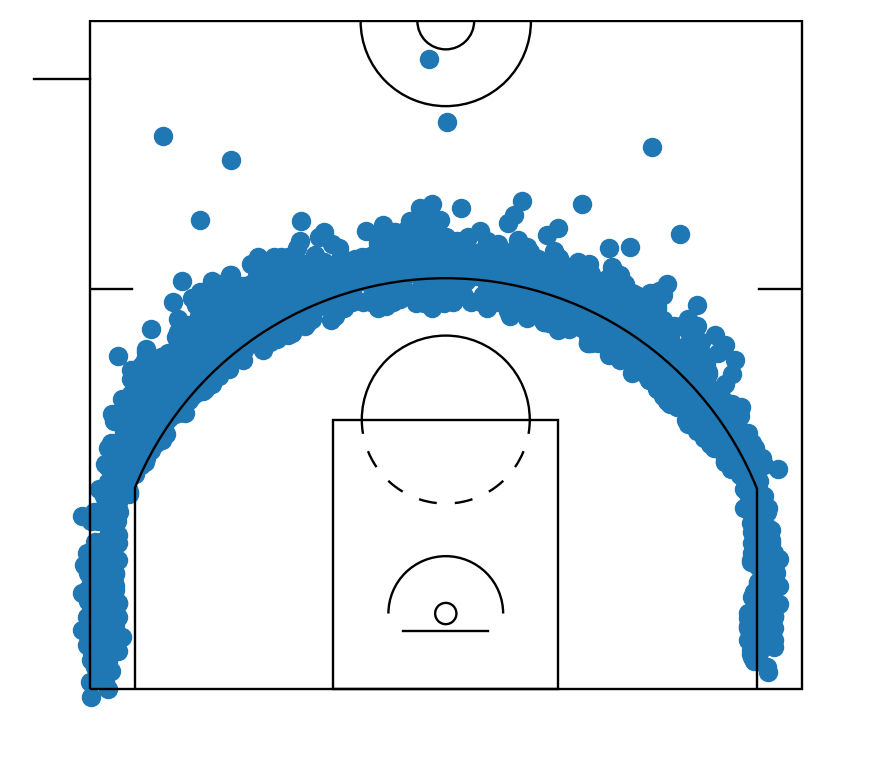

In [157]:
file_path = os.getenv('OUTPUT_FILE')

data = pd.read_csv(file_path)
x = data['shotX']
y = data['shotY']

court = Court(court_type="nba", origin="top-left", units="ft")
fig, ax = court.draw(orientation="vd")
ax.scatter(x, y, zorder=-1)

# Hex-binning

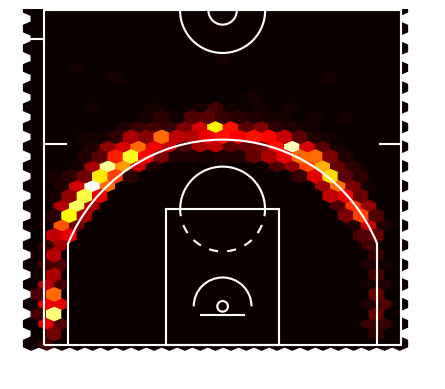

In [90]:
# Initialize Court object
origin = "top-left"
court = Court(court_type="nba", origin="top-left", units="ft")
fig, ax = plt.subplots()

# Transform the data
x_1_hl, y_1_hl = transform(x, y, fr="h", to="hl", origin=origin)

# Draw the court, slightly thicken the lines
court.draw(ax, line_color="white", line_width=0.3, orientation="vd")

# Hex-bin the data, while ensuring that the court is plotted on top
ax.hexbin(x_1_hl, y_1_hl, gridsize=(24, 18), extent=(-2, 50, 0, 50), zorder=0, cmap="hot")

# Heatmaps

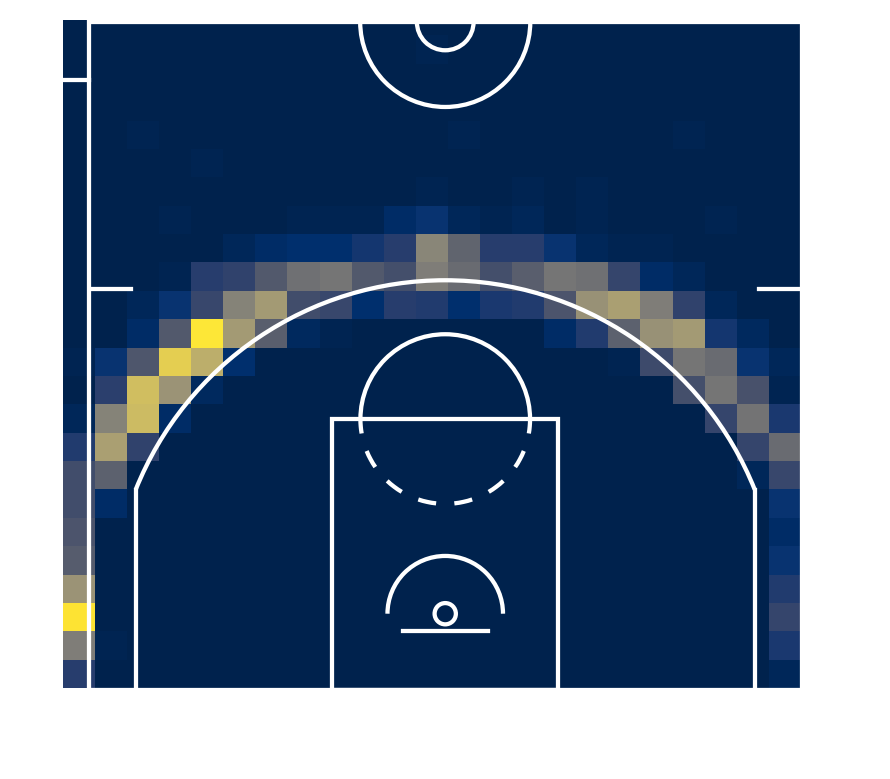

In [85]:
# Compute the heatmap
heatmap_1, xedges_1, yedges_1 = np.histogram2d(x, y, bins=(94//4, 50//2), range=[[0, 94/2], [0, 50]])

# Draw the court, slightly thicken the lines
fig, ax = court.draw(line_color="white", line_width=0.3, orientation="vd")

# Display the heatmaps
ax.imshow(heatmap_1.T, origin='lower', cmap='cividis', zorder=-1, extent=(-2, 50, 0, 50))
